In [2]:
import sys
print(sys.executable)

/Users/kazutak/Git/draw-chart-py/.venv/bin/python


In [3]:
import sys
sys.version

'3.9.9 (main, Apr 22 2023, 13:11:31) \n[Clang 14.0.0 (clang-1400.0.29.202)]'

In [4]:
!python --version

Python 3.9.9


In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

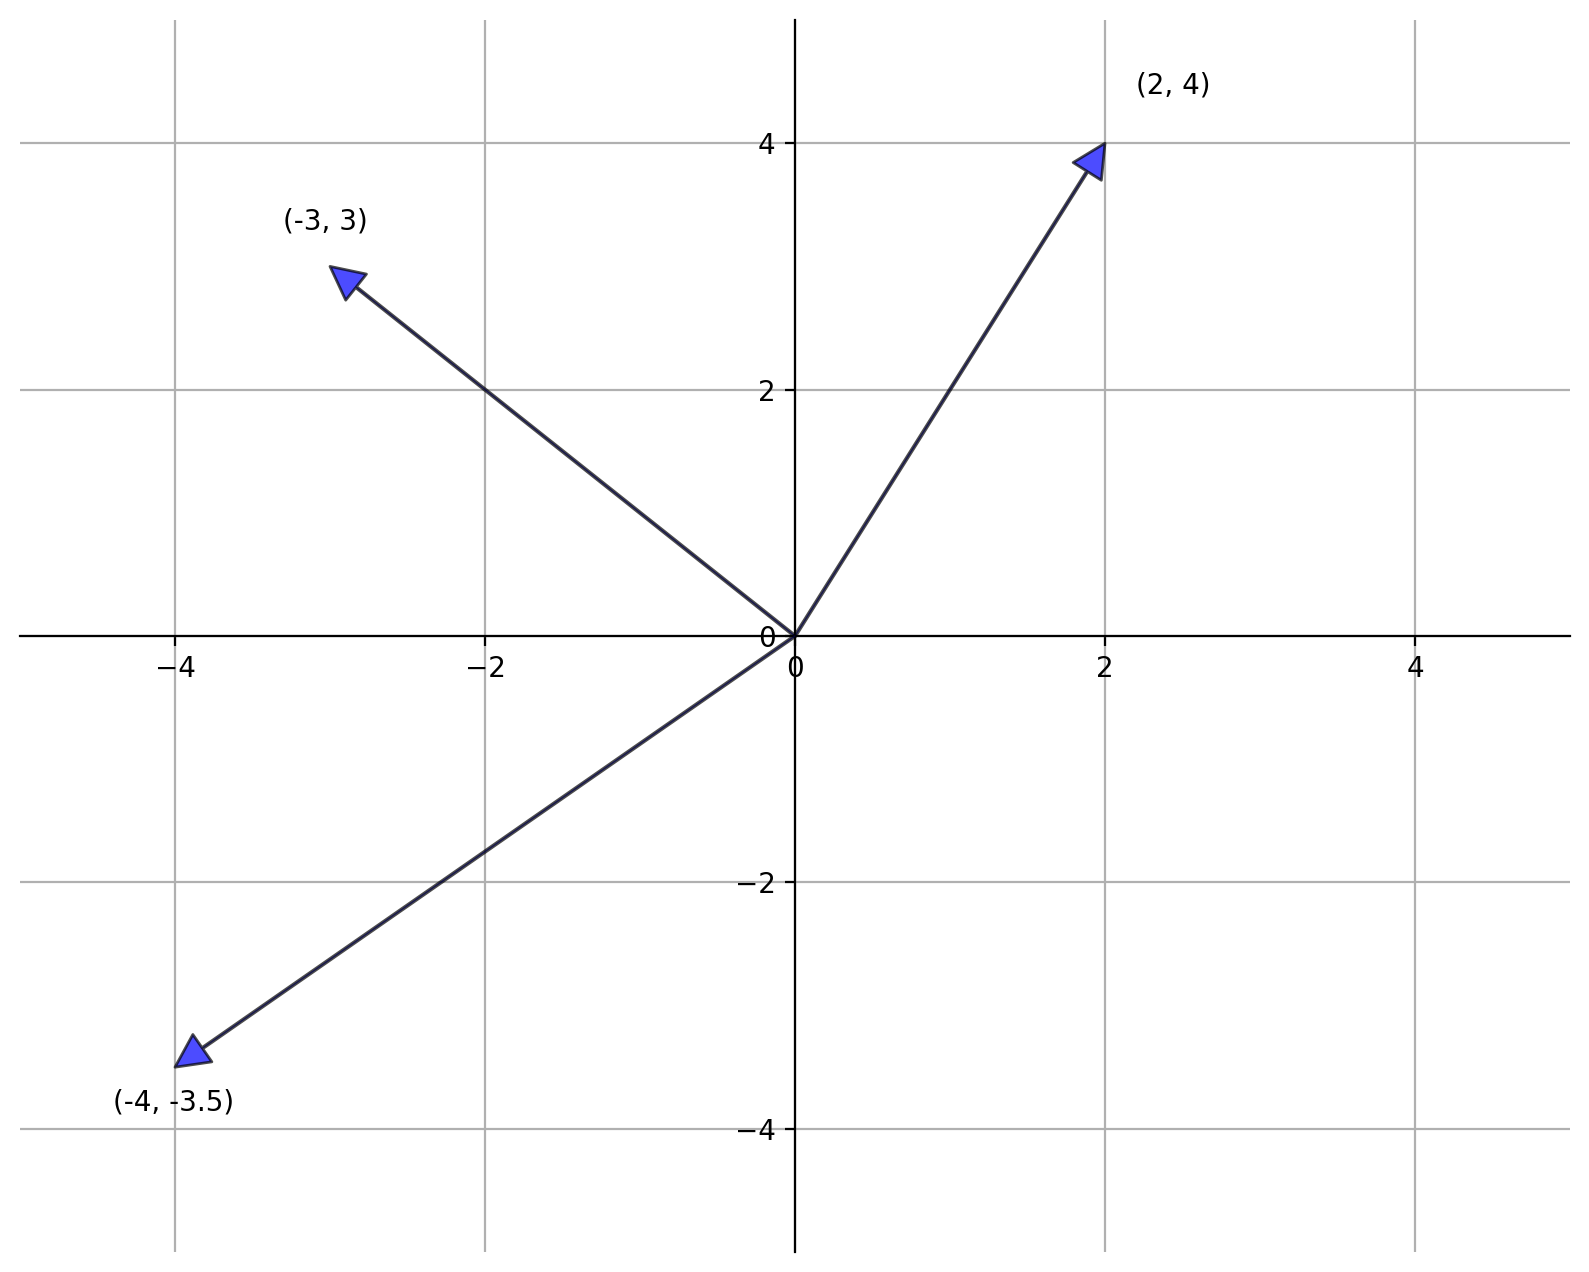

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy = v, xytext = (0, 0),
                arrowprops = dict(facecolor = 'blue',
                shrink = 0,
                alpha = 0.7,
                width = 0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()